## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`



In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df_new = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df_new.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 



<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

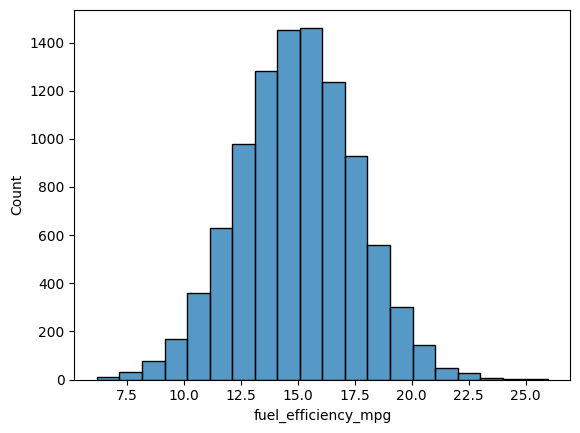

In [6]:
sns.histplot(df_new['fuel_efficiency_mpg'], bins=20)

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`




In [7]:
df_new.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Q1 Answer: horsepower

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199




In [8]:
df_new['horsepower'].mean()

np.float64(149.65729212983547)

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


In [9]:
np.random.seed(42)

idx = np.arange(df_new.shape[0])
np.random.shuffle(idx)

idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [10]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
idx_train = idx[:n_train]
idx_val = idx[n_train:n_train+n_val]
idx_test = idx[n_train+n_val:]

idx_train, idx_val, idx_test

(array([ 483, 7506, 8795, ..., 6735, 2052, 1776], shape=(5824,)),
 array([6163, 3313, 4781, ..., 7541, 1577, 3906], shape=(1940,)),
 array([3729, 7764, 4358, ..., 5390,  860, 7270], shape=(1940,)))

In [12]:
df_train = df_new.iloc[idx_train]
df_val = df_new.iloc[idx_val]
df_test = df_new.iloc[idx_test]

In [13]:
df_train.shape[0], df_val.shape[0], df_test.shape[0]

(5824, 1940, 1940)

In [14]:
df_train.reset_index(drop=True, inplace=True)
df_train.head() 

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [15]:
df_val.reset_index(drop=True, inplace=True)
df_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,180,112.0,2772.134410,2020,15.366341
1,260,138.0,3014.061530,2022,14.601182
2,140,181.0,3652.186151,2016,12.247032
3,270,105.0,2753.040847,2023,15.136400
4,170,224.0,4163.375137,2003,10.340419


In [16]:
df_test.reset_index(drop=True, inplace=True)    

df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,140,148.0,2704.826005,2017,15.804354
1,210,136.0,3001.227490,2004,14.272374
2,210,152.0,3747.467392,2021,11.748441
3,190,128.0,2705.833636,2014,16.485991
4,230,156.0,2505.939657,2005,17.779704


In [17]:
df_train.fuel_efficiency_mpg.mean(), df_val.fuel_efficiency_mpg.mean(), df_test.fuel_efficiency_mpg.mean()

(np.float64(14.95449932853275),
 np.float64(15.031198445240427),
 np.float64(15.031583099688055))

In [18]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [19]:
y_train.mean(), y_val.mean(), y_test.mean()

(np.float64(2.756321208025241),
 np.float64(2.7602358699629823),
 np.float64(2.7624156507616857))

In [20]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']  

In [21]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good



In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
df_train0 = df_train.copy()
df_train0['horsepower'] = df_train0['horsepower'].fillna(0)
df_train0.isnull().sum(), df_train.isnull().sum()


(engine_displacement    0
 horsepower             0
 vehicle_weight         0
 model_year             0
 dtype: int64,
 engine_displacement      0
 horsepower             429
 vehicle_weight           0
 model_year               0
 dtype: int64)

In [24]:
X_train0 = df_train0.values
w00, w0 = train_linear_regression(X_train0, y_train)
w00, w0, pd.Series(w0).isnull().sum(), w0.sum()

(np.float64(3.6646662472218297),
 array([ 2.14827083e-06,  2.21209296e-04, -3.23460699e-04,  1.64673232e-05]),
 np.int64(0),
 np.float64(-8.363580828516372e-05))

In [25]:
df_trainmean = df_train.copy()
df_trainmean['horsepower'] = df_trainmean['horsepower'].fillna(df_trainmean['horsepower'].mean())
df_trainmean.isnull().sum(), df_train.isnull().sum()

(engine_displacement    0
 horsepower             0
 vehicle_weight         0
 model_year             0
 dtype: int64,
 engine_displacement      0
 horsepower             429
 vehicle_weight           0
 model_year               0
 dtype: int64)

In [26]:
X_trainmean = df_trainmean.values
w0mean, wmean = train_linear_regression(X_trainmean, y_train)
w0mean, wmean, pd.Series(wmean).isnull().sum(), wmean.sum()

(np.float64(3.671000819543139),
 array([ 3.63140955e-06,  6.65758686e-04, -3.23242585e-04, -2.14173526e-05]),
 np.int64(0),
 np.float64(0.00032473015714839794))

In [27]:
df_val0 = df_val.copy()
df_val0['horsepower'] = df_val0['horsepower'].fillna(0)
X_val0 = df_val0.values

In [28]:
df_valmean = df_val.copy()
df_valmean['horsepower'] = df_valmean['horsepower'].fillna(df_trainmean['horsepower'].mean())
X_valmean = df_valmean.values   

In [29]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [30]:
y_pred0 = w00 + X_val0.dot(w0)
y_predmean = w0mean + X_valmean.dot(wmean)
y_pred0mean = w00 + X_valmean.dot(w0)
y_predmean0 = w0mean + X_val0.dot(wmean)
y_pred0, y_predmean, y_val, y_train, y_test, y_pred0mean, y_predmean0

(array([2.82641584, 2.75411816, 2.55686533, ..., 2.6745201 , 2.67029761,
        2.85296899], shape=(1940,)),
 array([2.8068845 , 2.74624076, 2.56829206, ..., 2.69564277, 2.67673323,
        2.83627891], shape=(1940,)),
 array([2.79522685, 2.74734667, 2.58377354, ..., 2.68192023, 2.69011317,
        2.82233377], shape=(1940,)),
 array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
        2.94261017], shape=(5824,)),
 array([2.82163803, 2.72604557, 2.54540897, ..., 2.96550163, 3.06816735,
        2.88011043], shape=(1940,)),
 array([2.82641584, 2.75411816, 2.55686533, ..., 2.6745201 , 2.67029761,
        2.85296899], shape=(1940,)),
 array([2.8068845 , 2.74624076, 2.56829206, ..., 2.69564277, 2.67673323,
        2.83627891], shape=(1940,)))

In [31]:
rmse0 = rmse(y_val, y_pred0)
rmse0mean = rmse(y_val, y_pred0mean)
rmsemean = rmse(y_val, y_predmean)
rmsemean0 = rmse(y_val, y_predmean0)
rmse0, rmsemean, rmse0mean, rmsemean0

(np.float64(0.03997925782374439),
 np.float64(0.03732771701389712),
 np.float64(0.039431767310362034),
 np.float64(0.0449711964796841))

<Axes: ylabel='Count'>

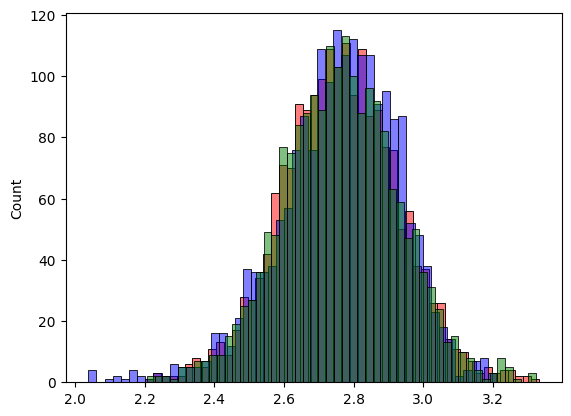

In [32]:
sns.histplot(y_pred0, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
sns.histplot(y_predmean, color='green', alpha=0.5, bins=50) 

### A3 
Fill Mean RMSE is better than Fill Zero. 



### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100




### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.




### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5



## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02
* If your answer doesn't match options exactly, select the closest one